In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
# Get current working directory
cwd = os.getcwd()

In [3]:
# Load the dataset 'ratings.csv'
# Dataset: MovieLens 25M Dataset
df_original = pd.read_csv(cwd + '\\ml-25m\\ratings.csv', parse_dates=['timestamp'])
#ratings_original['timestamp'] = pd.to_datetime(ratings_original['timestamp'], unit='s')
df = df_original.copy()

In [4]:
# Info about the rating dataset
df.info()
print('-'*100, '\n')
print(df.describe(include = 'all'))
print('-'*100, '\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 762.9+ MB
---------------------------------------------------------------------------------------------------- 

              userId       movieId        rating  timestamp
count   2.500010e+07  2.500010e+07  2.500010e+07   25000095
unique           NaN           NaN           NaN   20115267
top              NaN           NaN           NaN  825638400
freq             NaN           NaN           NaN        619
mean    8.118928e+04  2.138798e+04  3.533854e+00        NaN
std     4.679172e+04  3.919886e+04  1.060744e+00        NaN
min     1.000000e+00  1.000000e+00  5.000000e-01        NaN
25%     4.051000e+04  1.196000e+03  3.000000e+00        NaN
50%     8.091400e+04  2.947000e+03 

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
# Check missing values for the dataset
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
# Rating number per user
rating_num = len(df)
user_num = len(df['userId'].unique())
rating_per_user = round(rating_num / user_num)
print('There are now {} rows of data from {} users.'.format(rating_num, user_num))
print('Each user has rated {} movies on average.'.format(rating_per_user))

There are now 25000095 rows of data from 162541 users.
Each user has rated 154 movies on average.


In [7]:
# Rating number per movie
movie_num = len(df['movieId'].unique())
rating_per_movie = round(rating_num / movie_num)
print('There are now {} rows of data from {} movies.'.format(rating_num, movie_num))
print('Each movie is rated for {} times on average.'.format(rating_per_movie))

There are now 25000095 rows of data from 59047 movies.
Each movie is rated for 423 times on average.


Text(0, 0.5, 'Count')

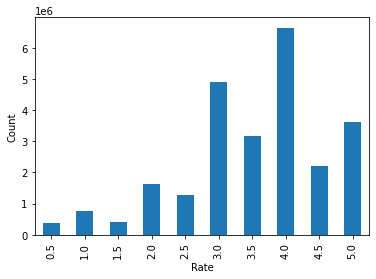

In [20]:
ax = df.groupby('rating')['rating'].count().reindex().plot.bar()
ax.set_xlabel('Rate')
ax.set_ylabel('Count')